<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,304580.667889,304797.476463,-22493.701563,327291.178025
1,0.0,1.0,31.366483,71.034415,96.409285,-71839.746413,-71630.936231,-19523.230542,-52107.705690
2,0.0,2.0,51.922364,82.986706,60.410357,220902.173521,221107.492948,-19732.600704,240840.093651
3,0.0,3.0,78.696281,81.280583,59.766649,-78607.086939,-78377.343425,-44604.121674,-33773.221751
4,0.0,4.0,48.841553,88.182138,52.523629,-606294.626336,-606095.079015,-14052.858205,-592042.220810
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-2004.215814,-1902.499339,12823.231299,-14725.730638
119996,999.0,116.0,27.906656,51.078876,95.044667,50164.935747,50348.965945,-11133.987565,61482.953510
119997,999.0,117.0,95.548916,24.560497,20.532904,-3218.031644,-3067.389328,33864.551163,-36931.940491
119998,999.0,118.0,22.596330,30.274677,65.326228,-9214.829828,-9086.632593,6903.945713,-15990.578306


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,304580.667889,304797.476463,-22493.701563,327291.178025
1,0.0,1.0,31.366483,71.034415,96.409285,-71839.746413,-71630.936231,-19523.230542,-52107.705690
2,0.0,2.0,51.922364,82.986706,60.410357,220902.173521,221107.492948,-19732.600704,240840.093651
3,0.0,3.0,78.696281,81.280583,59.766649,-78607.086939,-78377.343425,-44604.121674,-33773.221751
4,0.0,4.0,48.841553,88.182138,52.523629,-606294.626336,-606095.079015,-14052.858205,-592042.220810
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-2004.215814,-1902.499339,12823.231299,-14725.730638
119996,999.0,116.0,27.906656,51.078876,95.044667,50164.935747,50348.965945,-11133.987565,61482.953510
119997,999.0,117.0,95.548916,24.560497,20.532904,-3218.031644,-3067.389328,33864.551163,-36931.940491
119998,999.0,118.0,22.596330,30.274677,65.326228,-9214.829828,-9086.632593,6903.945713,-15990.578306


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    24.707638  92.860426  ... -22493.701563  327291.178025
      1.0    31.366483  71.034415  ... -19523.230542  -52107.705690
      2.0    51.922364  82.986706  ... -19732.600704  240840.093651
      3.0    78.696281  81.280583  ... -44604.121674  -33773.221751
      4.0    48.841553  88.182138  ... -14052.858205 -592042.220810
...                ...        ...  ...           ...            ...
999.0 115.0  37.640988  24.961075  ...  12823.231299  -14725.730638
      116.0  27.906656  51.078876  ... -11133.987565   61482.953510
      117.0  95.548916  24.560497  ...  33864.551163  -36931.940491
      118.0  22.596330  30.274677  ...   6903.945713  -15990.578306
      119.0  79.887997  22.570105  ...  33494.963087  -36458.684956

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    24.707638  92.860426  ... -22493.701563  327291.178025
      1.0    31.366483  71.034415  ... -19523.230542  -52107.705690
      2.0    51.922364  82.986706  ... -19732.600704  240840.093651
      3.0    78.696281  81.280583  ... -44604.121674  -33773.221751
      4.0    48.841553  88.182138  ... -14052.858205 -592042.220810
...                ...        ...  ...           ...            ...
999.0 115.0  37.640988  24.961075  ...  12823.231299  -14725.730638
      116.0  27.906656  51.078876  ... -11133.987565   61482.953510
      117.0  95.548916  24.560497  ...  33864.551163  -36931.940491
      118.0  22.596330  30.274677  ...   6903.945713  -15990.578306
      119.0  79.887997  22.570105  ...  33494.963087  -36458.684956

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,304580.667889,304797.476463,-22493.701563,327291.178025
1,0.0,1.0,31.366483,71.034415,96.409285,-71839.746413,-71630.936231,-19523.230542,-52107.705690
2,0.0,2.0,51.922364,82.986706,60.410357,220902.173521,221107.492948,-19732.600704,240840.093651
3,0.0,3.0,78.696281,81.280583,59.766649,-78607.086939,-78377.343425,-44604.121674,-33773.221751
4,0.0,4.0,48.841553,88.182138,52.523629,-606294.626336,-606095.079015,-14052.858205,-592042.220810
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-2004.215814,-1902.499339,12823.231299,-14725.730638
119996,999.0,116.0,27.906656,51.078876,95.044667,50164.935747,50348.965945,-11133.987565,61482.953510
119997,999.0,117.0,95.548916,24.560497,20.532904,-3218.031644,-3067.389328,33864.551163,-36931.940491
119998,999.0,118.0,22.596330,30.274677,65.326228,-9214.829828,-9086.632593,6903.945713,-15990.578306


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    24.707638  92.860426  ... -22493.701563  327291.178025
      1.0    31.366483  71.034415  ... -19523.230542  -52107.705690
      2.0    51.922364  82.986706  ... -19732.600704  240840.093651
      3.0    78.696281  81.280583  ... -44604.121674  -33773.221751
      4.0    48.841553  88.182138  ... -14052.858205 -592042.220810
...                ...        ...  ...           ...            ...
999.0 115.0  37.640988  24.961075  ...  12823.231299  -14725.730638
      116.0  27.906656  51.078876  ... -11133.987565   61482.953510
      117.0  95.548916  24.560497  ...  33864.551163  -36931.940491
      118.0  22.596330  30.274677  ...   6903.945713  -15990.578306
      119.0  79.887997  22.570105  ...  33494.963087  -36458.684956

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

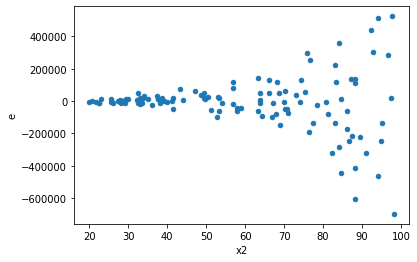

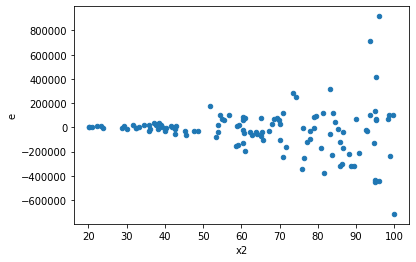

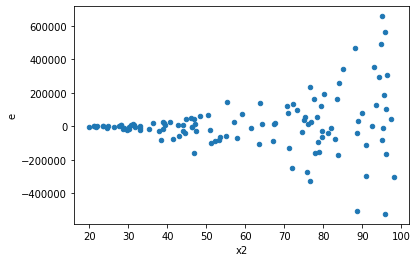

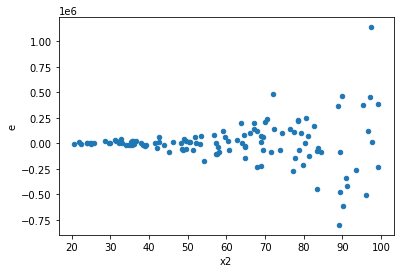

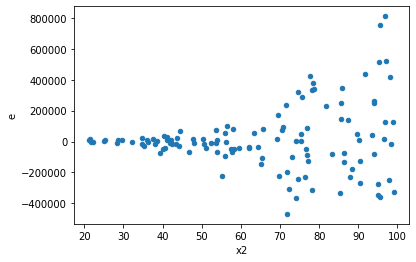

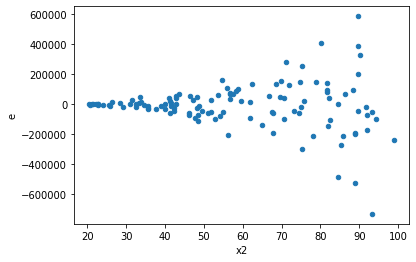

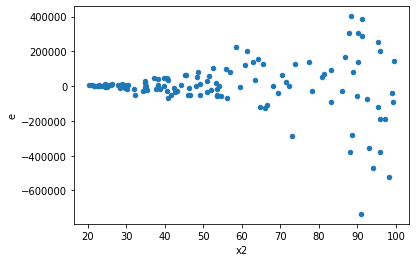

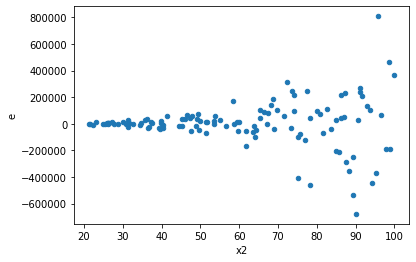

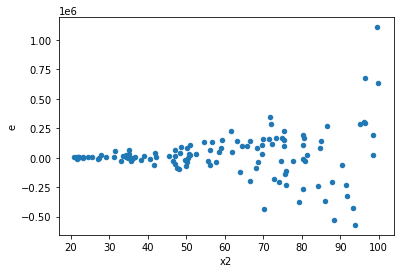

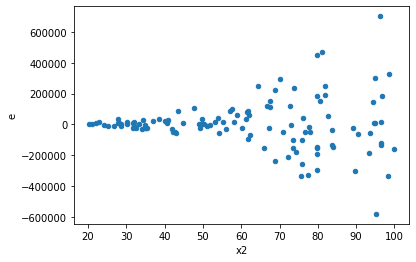

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,3165351014619.8506,18760260500.224045,71939795786.81479,426369556.8232737,168.7263891981696,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3759358265334.911,139000065582.2093,85439960575.79344,3159092399.5956655,27.045730155512054,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2761815280117.0347,51858714064.40436,62768529093.56897,1178607137.8273718,53.256532290543916,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,4578943470174.069,38925532224.76887,104066897049.41066,884671186.9265652,117.63341972394208,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3989628856725.3896,99681348325.74374,90673383107.39522,2265485189.221449,40.02382515621558,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2472548334976.3447,54390309458.73318,56194280340.37147,1236143396.7893903,45.45935405740444,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2446309092989.4385,34846460981.74591,55597933931.57815,791965022.312407,70.20251193574353,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,3247794161024.5566,33048207649.574593,73813503659.64902,751095628.3994225,98.27444185362238,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,4214540800976.066,55636004174.67134,95785018204.0015,1264454640.3334396,75.75203977166218,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,3165351014619.8506,18760260500.224045,71939795786.81479,426369556.8232737,168.7263891981696,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,3759358265334.911,139000065582.2093,85439960575.79344,3159092399.5956655,27.045730155512054,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,2761815280117.0347,51858714064.40436,62768529093.56897,1178607137.8273718,53.256532290543916,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,4578943470174.069,38925532224.76887,104066897049.41066,884671186.9265652,117.63341972394208,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,3989628856725.3896,99681348325.74374,90673383107.39522,2265485189.221449,40.02382515621558,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,2472548334976.3447,54390309458.73318,56194280340.37147,1236143396.7893903,45.45935405740444,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,2446309092989.4385,34846460981.74591,55597933931.57815,791965022.312407,70.20251193574353,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,3247794161024.5566,33048207649.574593,73813503659.64902,751095628.3994225,98.27444185362238,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,4214540800976.066,55636004174.67134,95785018204.0015,1264454640.3334396,75.75203977166218,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64